In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
raw_data=pd.read_csv('COVID-19 Global - Dataset.csv')

In [4]:
raw_data.head(3)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209",NaN,"1,199,031",NaN,"109,053,249",NaN,"1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429",161,"533,475",2.0,NaN,NaN,NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013","2,556","271,490,188","4,139,547","65,584,518"


In [5]:
covid_data=raw_data.drop(['New Cases','New Deaths','New Recovered','Active Cases','Serious, Critical'], axis=1)

In [6]:
covid_data.head(3)

,Country,Total Cases,Total Deaths,Total Recovered,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209","1,199,031","109,053,249","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429","533,475",NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560","167,642","39,970,918","612,013","2,556","271,490,188","4,139,547","65,584,518"


In [7]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           239 non-null    object
 1   Total Cases       239 non-null    object
 2   Total Deaths      234 non-null    object
 3   Total Recovered   190 non-null    object
 4   Tot Cases/1M pop  230 non-null    object
 5   Deaths/1M pop     225 non-null    object
 6   Total Tests       213 non-null    object
 7   Tests/1M pop      213 non-null    object
 8   Population        229 non-null    object
dtypes: object(9)
memory usage: 16.9+ KB


In [8]:
# 이상의 모든 데이터들은 문자형들임

In [13]:
cols=list(covid_data.columns.values)
cols=cols[1:]
cols

['Total Cases',
 'Total Deaths',
 'Total Recovered',
 'Tot Cases/1M pop',
 'Deaths/1M pop',
 'Total Tests',
 'Tests/1M pop',
 'Population']

In [14]:
for x in cols:
    covid_data[x]=covid_data[x].str.replace(',','').astype('float')

In [15]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           239 non-null    object 
 1   Total Cases       239 non-null    float64
 2   Total Deaths      234 non-null    float64
 3   Total Recovered   190 non-null    float64
 4   Tot Cases/1M pop  230 non-null    float64
 5   Deaths/1M pop     225 non-null    float64
 6   Total Tests       213 non-null    float64
 7   Tests/1M pop      213 non-null    float64
 8   Population        229 non-null    float64
dtypes: float64(8), object(1)
memory usage: 16.9+ KB


In [16]:
covid_data=covid_data.sort_values(by='Population', ascending=False)

In [17]:
covid_data

,Country,Total Cases,Total Deaths,Total Recovered,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
230,China,503302.0,5272.0,379053.0,347.0,4.0,1.600000e+08,110461.0,1.448471e+09
1,India,45028429.0,533475.0,NaN,32012.0,379.0,9.358795e+08,665334.0,1.406632e+09
0,USA,111367209.0,1199031.0,109053249.0,332633.0,3581.0,1.186743e+09,3544577.0,3.348053e+08
19,Indonesia,6828605.0,162033.0,6647104.0,24463.0,580.0,1.141589e+08,408975.0,2.791345e+08
52,Pakistan,1581936.0,30664.0,1538689.0,6893.0,134.0,3.058915e+07,133292.0,2.294890e+08
...,...,...,...,...,...,...,...,...,...
234,Total:,69791773.0,1365551.0,66648277.0,NaN,NaN,NaN,NaN,NaN
235,Total:,14826780.0,32665.0,14572565.0,NaN,NaN,NaN,NaN,NaN
236,Total:,12859770.0,258884.0,12089899.0,NaN,NaN,NaN,NaN,NaN
237,Total:,721.0,15.0,706.0,NaN,NaN,NaN,NaN,NaN


In [19]:
min_25_covid_case=covid_data['Total Cases'].sort_values().head(25).to_list()

In [20]:
min_25_covid_case

[9.0,
 10.0,
 29.0,
 80.0,
 712.0,
 721.0,
 1055.0,
 1403.0,
 1930.0,
 2166.0,
 2943.0,
 3452.0,
 3550.0,
 3904.0,
 5085.0,
 5393.0,
 5507.0,
 6279.0,
 6607.0,
 6749.0,
 6751.0,
 7203.0,
 7392.0,
 7701.0,
 7779.0]

In [21]:
min_25_case=covid_data[covid_data['Total Cases'].isin(min_25_covid_case)].sort_values('Total Cases')

In [22]:
min_25_case

,Country,Total Cases,Total Deaths,Total Recovered,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
229,MS Zaandam,9.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN
228,Western Sahara,10.0,1.0,9.0,16.0,2.0,NaN,NaN,626161.0
227,Vatican City,29.0,NaN,29.0,36295.0,NaN,NaN,NaN,799.0
226,Tokelau,80.0,NaN,NaN,58055.0,NaN,NaN,NaN,1378.0
225,Diamond Princess,712.0,13.0,699.0,NaN,NaN,NaN,NaN,NaN
237,Total:,721.0,15.0,706.0,NaN,NaN,NaN,NaN,NaN
224,Niue,1055.0,NaN,1053.0,650432.0,NaN,NaN,NaN,1622.0
223,Montserrat,1403.0,8.0,1376.0,282578.0,1611.0,17762.0,3577442.0,4965.0
222,Falkland Islands,1930.0,NaN,1930.0,545352.0,NaN,8632.0,2439107.0,3539.0
221,Saint Helena,2166.0,NaN,2.0,354211.0,NaN,NaN,NaN,6115.0


In [23]:
# 필터링 작업 필요, 인구수가 부정형이면 드롭!

In [28]:
covid_data.dropna(subset=['Population'], inplace=True)

In [29]:
covid_data.tail()

,Country,Total Cases,Total Deaths,Total Recovered,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
223,Montserrat,1403.0,8.0,1376.0,282578.0,1611.0,17762.0,3577442.0,4965.0
222,Falkland Islands,1930.0,NaN,1930.0,545352.0,NaN,8632.0,2439107.0,3539.0
224,Niue,1055.0,NaN,1053.0,650432.0,NaN,NaN,NaN,1622.0
226,Tokelau,80.0,NaN,NaN,58055.0,NaN,NaN,NaN,1378.0
227,Vatican City,29.0,NaN,29.0,36295.0,NaN,NaN,NaN,799.0


In [40]:
min_30_case=covid_data['Total Cases'].sort_values().head(30).to_list()

In [41]:
min_30_case

[10.0,
 29.0,
 80.0,
 1055.0,
 1403.0,
 1930.0,
 2166.0,
 2943.0,
 3452.0,
 3550.0,
 3904.0,
 5085.0,
 5393.0,
 5507.0,
 6279.0,
 6607.0,
 6749.0,
 6751.0,
 7203.0,
 7392.0,
 7701.0,
 7779.0,
 8090.0,
 9106.0,
 9109.0,
 9614.0,
 9674.0,
 9931.0,
 10189.0,
 11051.0]

In [42]:
min_30_case=covid_data[covid_data['Total Cases'].isin(min_30_case)].sort_values('Total Cases')

In [44]:
min_30_case.head(3)

,Country,Total Cases,Total Deaths,Total Recovered,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
228,Western Sahara,10.0,1.0,9.0,16.0,2.0,NaN,NaN,626161.0
227,Vatican City,29.0,NaN,29.0,36295.0,NaN,NaN,NaN,799.0
226,Tokelau,80.0,NaN,NaN,58055.0,NaN,NaN,NaN,1378.0


In [46]:
min_30_case.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 228 to 198
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           30 non-null     object 
 1   Total Cases       30 non-null     float64
 2   Total Deaths      25 non-null     float64
 3   Total Recovered   24 non-null     float64
 4   Tot Cases/1M pop  30 non-null     float64
 5   Deaths/1M pop     25 non-null     float64
 6   Total Tests       22 non-null     float64
 7   Tests/1M pop      22 non-null     float64
 8   Population        30 non-null     float64
dtypes: float64(8), object(1)
memory usage: 2.3+ KB


In [52]:
min_30_case.rename(columns={'Total Cases': 'total_cases'}, inplace=True)

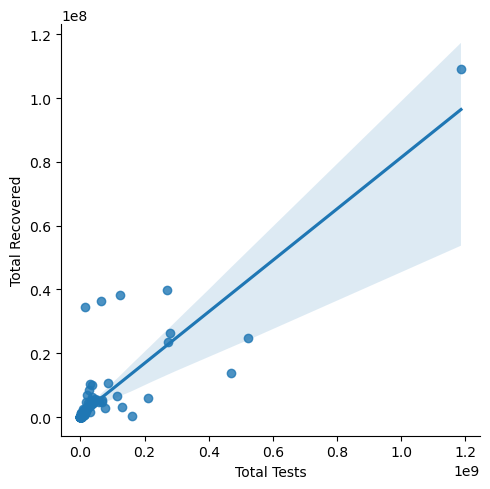

In [63]:
sns.lmplot(
    data=covid_data,
    x='Total Tests',
    y='Total Recovered'
)

<Axes: xlabel='total_cases', ylabel='Count'>

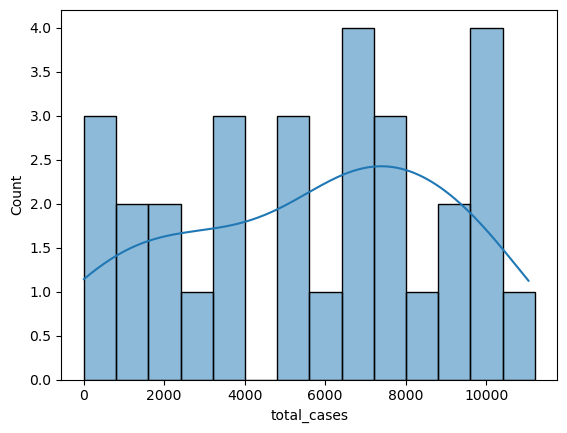

In [61]:
sns.histplot(
    data=min_30_case,
    x='total_cases',
    binwidth=800,
    kde=True
)

<Axes: xlabel='Country', ylabel='total_cases'>

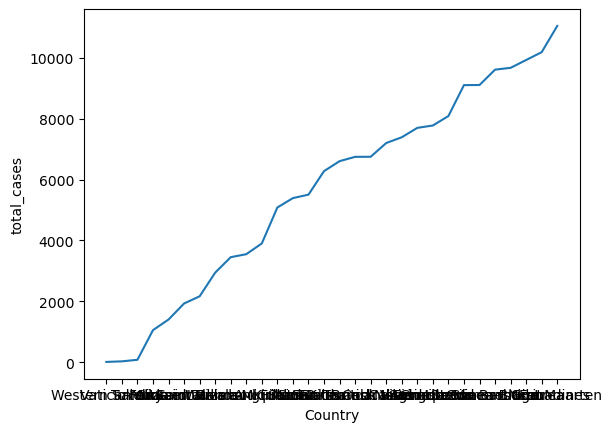

In [66]:
sns.lineplot(
    data=min_30_case,
    x='Country',
    y='total_cases'
)

<Axes: xlabel='Country', ylabel='Tot Cases/1M pop'>

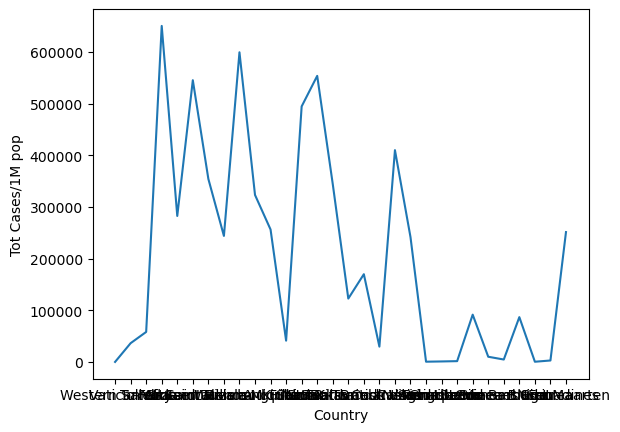

In [67]:
sns.lineplot(
    data=min_30_case,
    x='Country',
    y='Tot Cases/1M pop'
)